In [127]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [128]:
df = pd.read_excel("1927_1051417D.xlsx")

In [129]:
#Cycle Time
df.loc[(df['Cycl Time (s)']>=24) & (df['Cycl Time (s)']<=35),'Cycle_Time_Value'] = 'Cycle_Time_True'
df.loc[(df['Cycl Time (s)'] < 24) | (df['Cycl Time (s)'] > 35),'Cycle_Time_Value'] = 'Cycle_Time_False'

#Slow Speed
df.loc[(df['Low Spd (m/s)']>=0.290) & (df['Low Spd (m/s)']<=0.310),'L Spd Value'] = 'L_Spd_True'
df.loc[(df['Low Spd (m/s)'] < 0.290) | (df['Low Spd (m/s)'] > 0.310),'L Spd Value'] = 'L_Spd_False'

#High Speed
df.loc[(df['High Spd (m/s)']>=2.5) & (df['High Spd (m/s)']<=3.5),'H Spd Value'] = 'H_Spd_True'
df.loc[(df['High Spd (m/s)'] < 2.5) | (df['High Spd (m/s)'] > 3.5),'H Spd Value'] = 'H_Spd_False'

#High Speed Length
df.loc[(df['H-Length (mm)']>=70) & (df['H-Length (mm)']<=80),'H_Length_State'] = 'H_Length_True'
df.loc[(df['H-Length (mm)'] < 70) | (df['H-Length (mm)'] > 80),'H_Length_State'] = 'H_Length_False'

#Fill Time
df.loc[(df['Fill Time (ms)']>=20) & (df['Fill Time (ms)']<=30),'Fill_Time_State'] = 'Fill_Time_True'
df.loc[(df['Fill Time (ms)'] < 20) | (df['Fill Time (ms)'] > 30),'Fill_Time_State'] = 'Fill_Time_False'

#Casting Pressure
df.loc[(df['Cast Pres (MPa)']>=100) & (df['Cast Pres (MPa)']<=110),'Cast_Pres_State'] = 'Cast_Pres_True'
df.loc[(df['Cast Pres (MPa)'] < 100) | (df['Cast Pres (MPa)'] > 110),'Cast_Pres_State'] = 'Cast_Pres_False'

#Biscuit Thickness
df.loc[(df['Bis Size (mm)']>=10) & (df['Bis Size (mm)']<=16),'Biz_Size_State'] = 'Biz_Size_True'
df.loc[(df['Bis Size (mm)'] < 10) | (df['Bis Size (mm)'] > 16),'Biz_Size_State'] = 'Biz_Size_False'

#Mold Temp, Fixed1, Min
df.loc[(df['A M.Temp 1 Min (ßC)']>=100) & (df['A M.Temp 1 Min (ßC)']<=140),'Temp_A_Min_State'] = 'Temp_A_Min_True'
df.loc[(df['A M.Temp 1 Min (ßC)'] < 100) | (df['A M.Temp 1 Min (ßC)'] > 140),'Temp_A_Min_State'] = 'Temp_A_Min_False'

#Mold Temp, Fixed2, Min
df.loc[(df['B M.Temp 2 Min (ßC)']>=100) & (df['B M.Temp 2 Min (ßC)']<=140),'Temp_B_Min_State'] = 'Temp_B_Min_True'
df.loc[(df['B M.Temp 2 Min (ßC)'] < 100) | (df['B M.Temp 2 Min (ßC)'] > 140),'Temp_B_Min_State'] = 'Temp_B_Min_False'

#Mold Temp, Moving1, Min
df.loc[(df['C F.Temp 1 Min (ßC)']>=100) & (df['C F.Temp 1 Min (ßC)']<=140),'Temp_C_Min_State'] = 'Temp_C_Min_True'
df.loc[(df['C F.Temp 1 Min (ßC)'] < 100) | (df['C F.Temp 1 Min (ßC)'] > 140),'Temp_C_Min_State'] = 'Temp_C_Min_False'

#Mold Temp, Moving2, Min
df.loc[(df['D F.Temp 2 Min (ßC)']>=100) & (df['D F.Temp 2 Min (ßC)']<=140),'Temp_D_Min_State'] = 'Temp_D_Min_True'
df.loc[(df['D F.Temp 2 Min (ßC)'] < 100) | (df['D F.Temp 2 Min (ßC)'] > 140),'Temp_D_Min_State'] = 'Temp_D_Min_False'

#All Temp
df.loc[(df['E Metal Ave (ßC)']>=659) & (df['E Metal Ave (ßC)']<=681),'AL_Temp_State'] = 'AL_Temp_True'
df.loc[(df['E Metal Ave (ßC)'] < 659) | (df['E Metal Ave (ßC)'] > 681),'AL_Temp_State'] = 'AL_Temp_False'


In [130]:
#Pass Part
df.loc[(df['Cycle_Time_Value']=='Cycle_Time_True') & (df['L Spd Value']=='L_Spd_True') 
       & (df['H Spd Value']=='H_Spd_True') & (df['H_Length_State']=='H_Length_True') 
       & (df['Fill_Time_State']=='Fill_Time_True') 
       & (df['Cast_Pres_State']=='Cast_Pres_True') 
       & (df['Biz_Size_State']=='Biz_Size_True')
       & (df['Temp_A_Min_State']=='Temp_A_Min_True')
       & (df['Temp_B_Min_State']=='Temp_B_Min_True')
       & (df['Temp_C_Min_State']=='Temp_C_Min_True')
       & (df['Temp_D_Min_State']=='Temp_D_Min_True')
       & (df['AL_Temp_State']=='AL_Temp_True'),'Pass_Status'] = 1

#Failed Part
df.loc[(df['Cycle_Time_Value']=='Cycle_Time_False') | (df['L Spd Value']=='L_Spd_False') 
       | (df['H Spd Value']=='H_Spd_False') | (df['H_Length_State']=='H_Length_False') 
       | (df['Fill_Time_State']=='Fill_Time_False') 
       | (df['Cast_Pres_State']=='Cast_Pres_False') 
       | (df['Biz_Size_State']=='Biz_Size_False')
       | (df['Temp_A_Min_State']=='Temp_A_Min_False')
       | (df['Temp_B_Min_State']=='Temp_B_Min_False')
       | (df['Temp_C_Min_State']=='Temp_C_Min_False')
       | (df['Temp_D_Min_State']=='Temp_D_Min_False')
       | (df['AL_Temp_State']=='AL_Temp_False'),'Pass_Status'] = 0


In [131]:
#Splitting
seg = df.groupby(['Pass_Status'])

#Failed Set
fail_part = seg.get_group(0)

#Pass Set
pass_part = seg.get_group(1)

In [132]:
date_file = df['Date']

In [133]:
date_file[0]

'08/10/20'

In [134]:
fail_count = fail_part.shape[0]

In [135]:
pass_count = pass_part.shape[0]

# Reason for Failure

LOW SPEED FAILURE

In [136]:
fail_lspd = fail_part.groupby(['L Spd Value'])
fail_lspd = fail_lspd.groups

if 'L_Spd_False' in fail_lspd.keys():
    fail_lspd = fail_part.groupby(['L Spd Value']).get_group('L_Spd_False').shape[0]
    
else:
    fail_lspd = 0

HIGH SPEED FAILURE

In [137]:
fail_hspd = fail_part.groupby(['H Spd Value'])
fail_hspd = fail_hspd.groups

if 'H_Spd_False' in fail_hspd.keys():
    fail_hspd = fail_part.groupby(['H Spd Value']).get_group('H_Spd_False').shape[0]
else:
    fail_hspd = 0

H LENGTH FAILURE

In [138]:
fail_h_length = fail_part.groupby(['H_Length_State'])
fail_h_length = fail_h_length.groups

if 'H_Length_False' in fail_h_length.keys():
    fail_h_length = fail_part.groupby(['H_Length_State']).get_group('H_Length_False').shape[0]
else:
    fail_h_length = 0

FILL TIME FAILURE

In [139]:
fail_fill_time = fail_part.groupby(['Fill_Time_State'])
fail_fill_time = fail_fill_time.groups

if 'Fill_Time_False' in fail_fill_time.keys():
    fail_fill_time = fail_part.groupby(['Fill_Time_State']).get_group('Fill_Time_False').shape[0]
else:
    fail_fill_time = 0

CAST PRESSURE FAILURE

In [140]:
fail_cast_group = fail_part.groupby(['Cast_Pres_State'])
fail_cast_pres = fail_cast_group.groups

if 'Cast_Pres_False' in fail_cast_pres.keys():
    fail_cast_pres = fail_cast_group.get_group('Cast_Pres_False').shape[0] 
else:
    fail_cast_pres = 0

BIZ SIZE FAILURE

In [141]:
fail_biz_group = fail_part.groupby(['Biz_Size_State'])
fail_biz = fail_biz_group.groups

if 'Biz_Size_False' in fail_biz.keys():
    fail_biz = fail_biz_group.get_group('Biz_Size_False').shape[0]
else:
    fail_biz = 0

TEMP A FAILURE

In [142]:
fail_tempa_group = fail_part.groupby(['Temp_A_Min_State'])
fail_tempa = fail_tempa_group.groups

if 'Temp_A_Min_False' in fail_tempa.keys():
    fail_tempa = fail_tempa_group.get_group('Temp_A_Min_False').shape[0]
else:
    fail_tempa = 0

TEMP B FAILURE

In [143]:
fail_tempb_group = fail_part.groupby(['Temp_B_Min_State'])
fail_tempb = fail_tempb_group.groups

if 'Temp_B_Min_False' in fail_tempb.keys():
    fail_tempb = fail_tempb_group.get_group('Temp_B_Min_False').shape[0]
else:
    fail_tempb = 0

TEMP C FAILURE

In [144]:
fail_tempc_group = fail_part.groupby(['Temp_C_Min_State'])
fail_tempc = fail_tempc_group.groups

if 'Temp_C_Min_False' in fail_tempc.keys():
    fail_tempc = fail_tempc_group.get_group('Temp_C_Min_False').shape[0]
else:
    fail_tempc = 0

TEMP D FAILURE

In [145]:
fail_tempd_group = fail_part.groupby(['Temp_D_Min_State'])
fail_tempd = fail_tempd_group.groups

if 'Temp_D_Min_False' in fail_tempd.keys():
    fail_tempd = fail_tempd_group.get_group('Temp_D_Min_False').shape[0]
else:
    fail_tempd = 0

AL TEMP FAILURE

In [146]:
fail_altemp_group = fail_part.groupby(['AL_Temp_State'])
fail_altemp = fail_altemp_group.groups

if 'AL_Temp_False' in fail_altemp.keys():
    fail_altemp = fail_altemp_group.get_group('AL_Temp_False').shape[0]
else:
    fail_altemp = 0

In [147]:
print(fail_lspd)
print(fail_hspd)
print(fail_h_length)
print(fail_fill_time)
print(fail_cast_pres)
print(fail_biz)
print(fail_tempa)
print(fail_tempb)
print(fail_tempc)
print(fail_tempd)
print(fail_altemp)


0
19
19
19
19
17
6
14
9
11
0


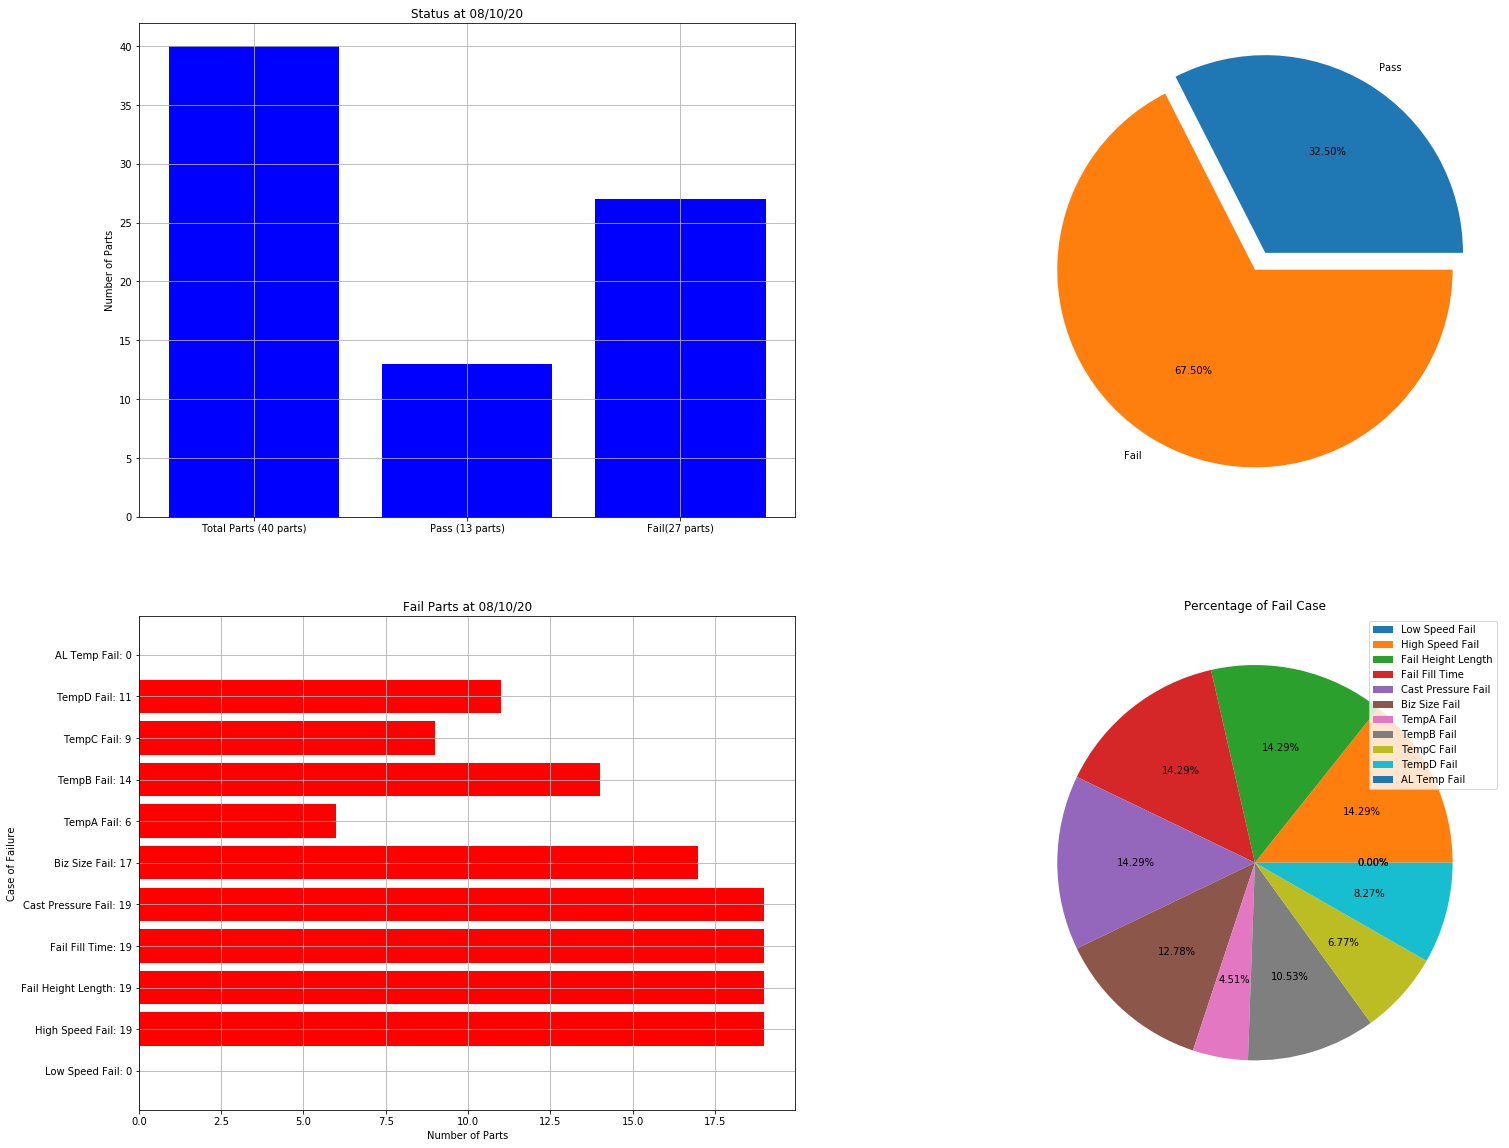

In [148]:
fig = plt.figure(figsize=(40,20))
axis1 = fig.add_subplot(2,3,1)

status = ['Total Parts '+ "("+ str(df.shape[0])+ " parts"+ ")",'Pass '+ "("+ str(pass_count)+ " parts"+ ")",
          'Fail'+ "("+ str(fail_count)+ " parts"+ ")"]
part_numbers = [df.shape[0],pass_count,fail_count]
part_status = ['Pass', 'Fail']

#for pie chart
explode = (0.1,0)
axis1.bar(status,part_numbers, color = 'b')
axis1.grid(True)
plt.title('Status at ' + date_file[0])
plt.ylabel("Number of Parts")

axis2 = fig.add_subplot(2,3,2)

axis2.pie([pass_count,fail_count], explode=explode, labels=part_status,autopct='%1.2f%%')

fail_cases = ['Low Speed Fail: '+str(fail_lspd),'High Speed Fail: ' + str(fail_hspd),'Fail Height Length: '+str(fail_h_length),
             'Fail Fill Time: '+str(fail_fill_time),'Cast Pressure Fail: '+ str(fail_cast_pres),
             'Biz Size Fail: '+ str(fail_biz), 'TempA Fail: '+str(fail_tempa),
              'TempB Fail: '+str(fail_tempb),
              'TempC Fail: '+str(fail_tempc),'TempD Fail: '+str(fail_tempd),'AL Temp Fail: '+str(fail_altemp)]

fail_status = [fail_lspd, fail_hspd, fail_h_length, fail_fill_time,fail_cast_pres,fail_biz,
               fail_tempa,fail_tempb,fail_tempc,fail_tempd,fail_altemp]
fail_labels = ['Low Speed Fail','High Speed Fail','Fail Height Length','Fail Fill Time','Cast Pressure Fail',
              'Biz Size Fail', 'TempA Fail','TempB Fail','TempC Fail','TempD Fail','AL Temp Fail']

#fig = plt.figure(figsize=(60,20))
axis3 = fig.add_subplot(2,3,4)
axis3.barh(fail_cases,fail_status,color='r')
axis3.grid(True)
plt.title('Fail Parts at ' + date_file[0])
plt.xlabel("Number of Parts")
plt.ylabel('Case of Failure')

axis4 = fig.add_subplot(2,3,5)
axis4.pie(fail_status,autopct='%1.2f%%')
axis4.legend(fail_labels,loc="upper right")
plt.title('Percentage of Fail Case')

fig.savefig('multipleplots.png')
